In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alcohol-consumption/gapminder_alcohol.csv


# Summarising Data

In [2]:
train_df = pd.read_csv("/kaggle/input/alcohol-consumption/gapminder_alcohol.csv")

In [3]:
train_df.head(10)

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
1,Albania,7.29,1914.996551,7.699330,51.400002,46.72
2,Algeria,0.69,2231.993335,4.848770,50.500000,65.22
3,Andorra,10.17,21943.339900,5.362179,NaN,88.92
4,Angola,5.57,1381.004268,14.554677,75.699997,56.70
5,Antigua and Barbuda,8.17,11894.464070,2.161843,NaN,30.46
6,Argentina,9.35,10749.419240,7.765584,58.400002,92.00
7,Armenia,13.66,1326.741757,3.741588,40.099998,63.86
8,Aruba,NaN,NaN,NaN,NaN,46.78
9,Australia,10.21,25249.986060,8.470030,61.500000,88.74


In [4]:
train_df.describe()

,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
count,187.000000,190.000000,191.000000,178.000000,203.000000
mean,6.689412,8740.966076,9.640839,58.635955,56.769360
std,4.899617,14262.809083,6.300178,10.519454,23.844933
min,0.030000,103.775857,0.201449,32.000000,10.400000
25%,2.625000,748.245151,4.988449,51.225000,36.830000
50%,5.920000,2553.496056,8.262893,58.699999,57.940000
75%,9.925000,9379.891166,12.328551,64.975000,74.210000
max,23.010000,105147.437700,35.752872,83.199997,100.000000


In [9]:
print(len(train_df))
summary = pd.DataFrame(train_df.dtypes)
summary["Null"] = train_df.isnull().sum()
summary["first"] = train_df.loc[0]
summary["second"] = train_df.loc[1]
summary["third"] = train_df.loc[2]
summary["unique"] = train_df.nunique()
summary

213


,0,Null,first,second,third,unique
country,object,0,Afghanistan,Albania,Algeria,213
alcconsumption,float64,26,0.03,7.29,0.69,180
incomeperperson,float64,23,NaN,1914.996551,2231.993335,190
suicideper100th,float64,22,6.684385,7.69933,4.84877,191
employrate,float64,35,55.700001,51.400002,50.5,139
urbanrate,float64,10,24.04,46.72,65.22,194


We can see here that all the countries are unique. There are few null values in the data. We need to take care of null values.Except country everything is in float.

# Univariate Analysis

In [14]:
def get_row_col_idx(idx):
    row_idx = idx//2
    col_idx = [0 if idx%2 == 0 else 1]
    return row_idx, col_idx[0]

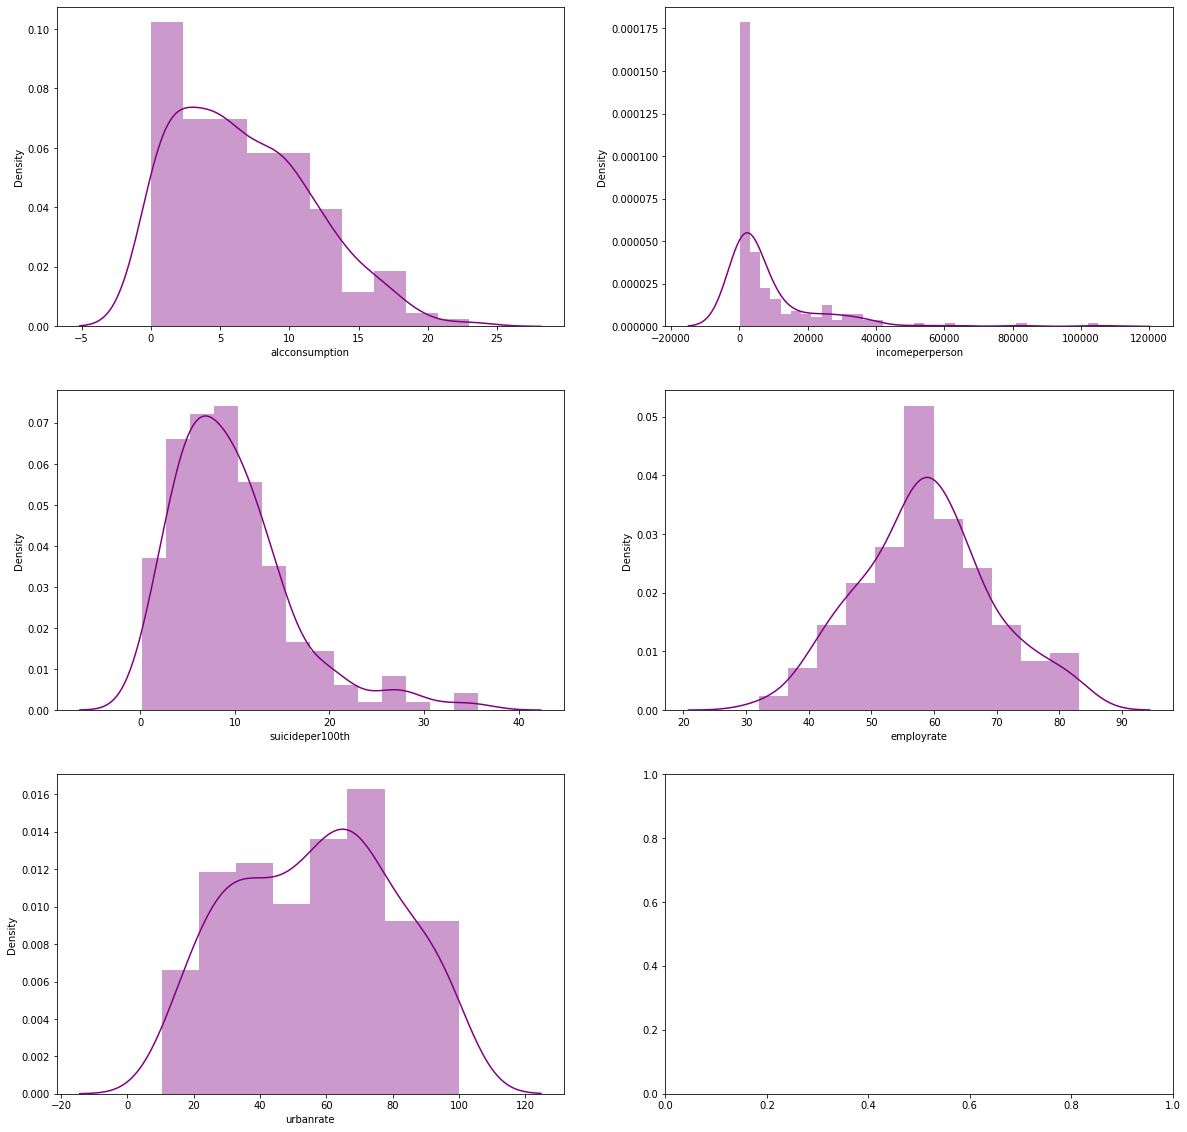

In [28]:
fig, ax = plt.subplots(3,2,figsize = (20,20))
for idx, cols in enumerate(train_df.columns.to_list()[1:]):
    row_idx, col_idx = get_row_col_idx(idx)
    ax1 = ax[row_idx][col_idx]
    sns.distplot(train_df[cols], ax = ax1, color = "purple")
    

We can see that the data is mostly right skewed. The data for employment rate is normally distributed though.
Let's also have a look at the boxplot.

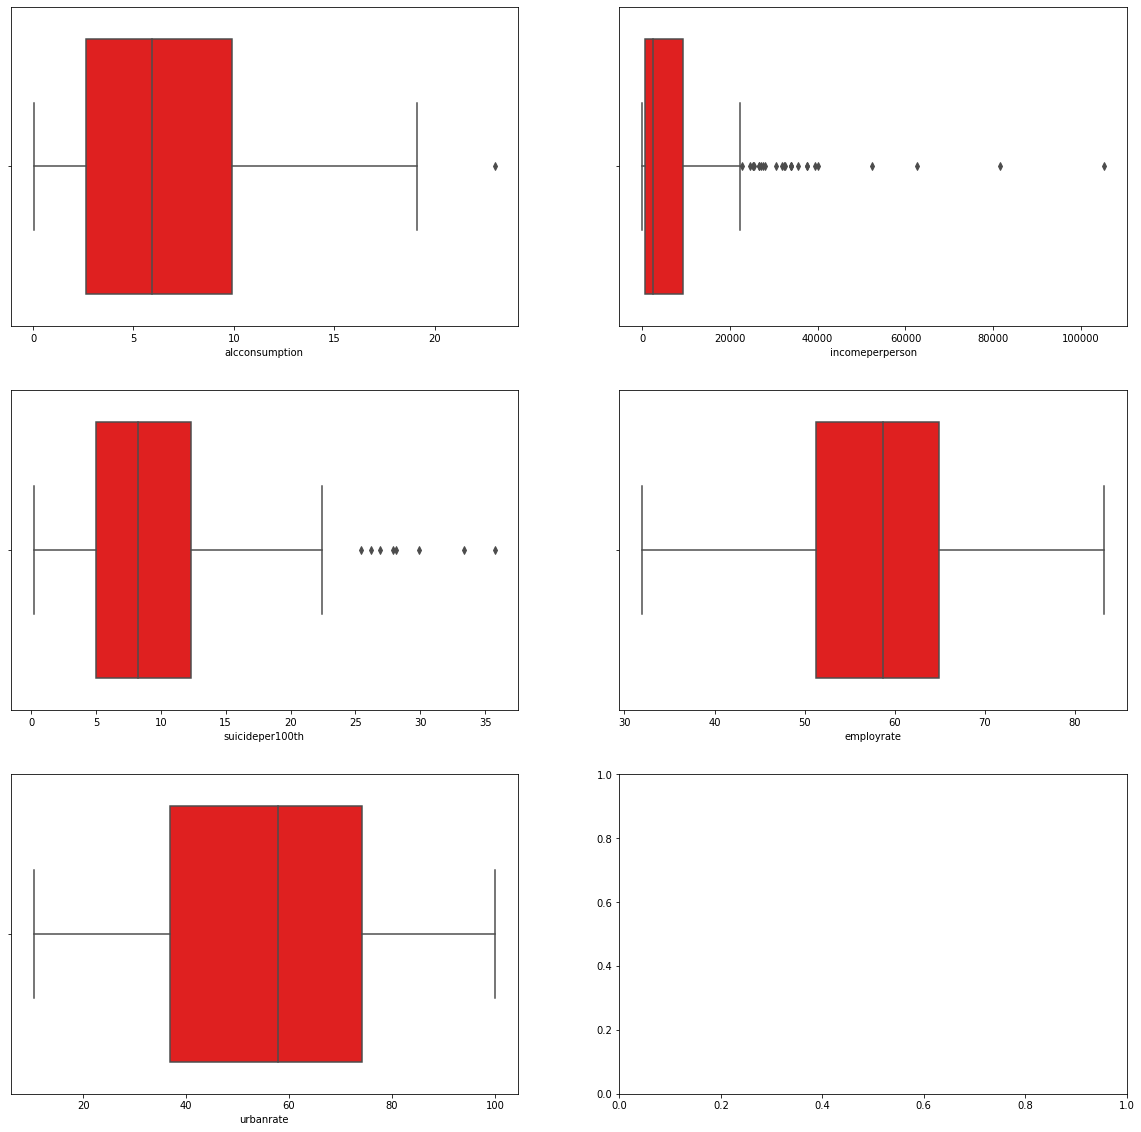

In [30]:
fig, ax = plt.subplots(3,2,figsize = (20,20))
for idx, cols in enumerate(train_df.columns.to_list()[1:]):
    row_idx, col_idx = get_row_col_idx(idx)
    ax1 = ax[row_idx][col_idx]
    sns.boxplot(train_df[cols], ax = ax1, color = "red")
    

The following obeservations from the above boxplots:
1. Alcconsumption has a mean around 6 and have few outliers that lies right to the mean.
2. The mean is arounf 8750 and 50% of the countries are having income per person less than that but the other 50% of the countries are having quite a few outliers which is quite apparent from the chart.
3. The distribution od suicide per 100th is having mean around 8 and have few outliers to the right.
4. The data for employment rate is normally distributed and its mean is around 59.
5. 50% of the countries are having less than 59 urbanrate while other 50% is having 59 and the max is about 100 that is there are few countries having their urban rate of around 100%.

# Bivariate Analysis

### Correlation between all the columns

<AxesSubplot:>

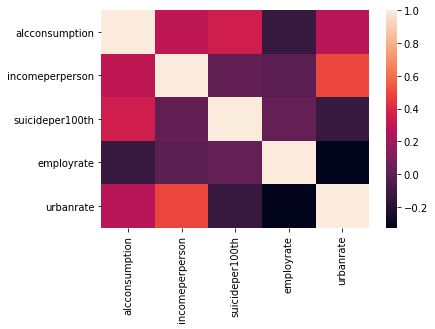

In [33]:
correlations = train_df.corr(method='pearson')
sns.heatmap(correlations)

From here we could see that incomeper person is quite correlated with suicide100th and employrate. Employrate is correlated with urbanrate. The more the urban popultaion, the more the employment rate. Let's have a look in more detail about these correlations.

#### Analysing Correlations

<AxesSubplot:xlabel='urbanrate', ylabel='incomeperperson'>

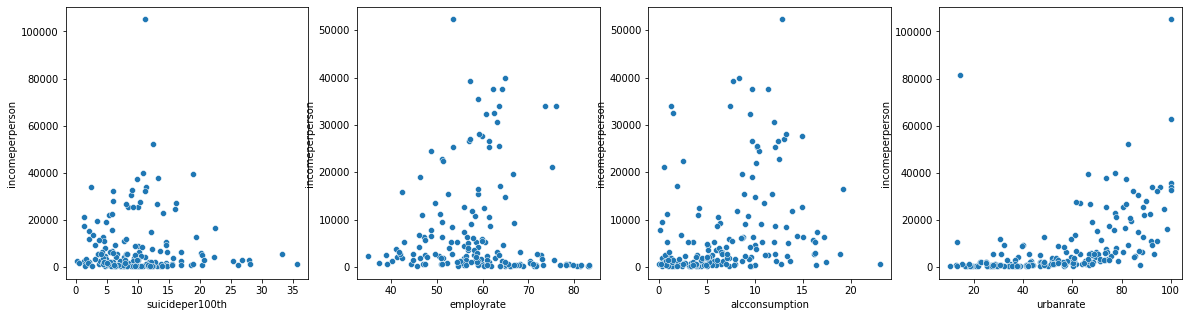

In [50]:
fig, ax = plt.subplots(1,4, figsize = (20,5))
sns.scatterplot(x="suicideper100th", y = "incomeperperson", data = train_df, ax = ax[0])
sns.scatterplot(x = "employrate", y = "incomeperperson", data = train_df, ax = ax[1])
sns.scatterplot(x = "alcconsumption", y = "incomeperperson", data = train_df, ax = ax[2])
sns.scatterplot(x = "urbanrate", y = "incomeperperson", data = train_df, ax = ax[3])

From this scatterplot it seems like there is some relaionship in urbanrateand incomeperperson, as the urbanrate is increasing, the incomperperson is also increasing. As the employrate increases the incomeperperson is increasing as well. 
Let's have a look at other plots and see what kind of relation does they have.

In [51]:
train_df.columns

Index(['country', 'alcconsumption', 'incomeperperson', 'suicideper100th',
       'employrate', 'urbanrate'],
      dtype='object')

<AxesSubplot:xlabel='employrate', ylabel='urbanrate'>

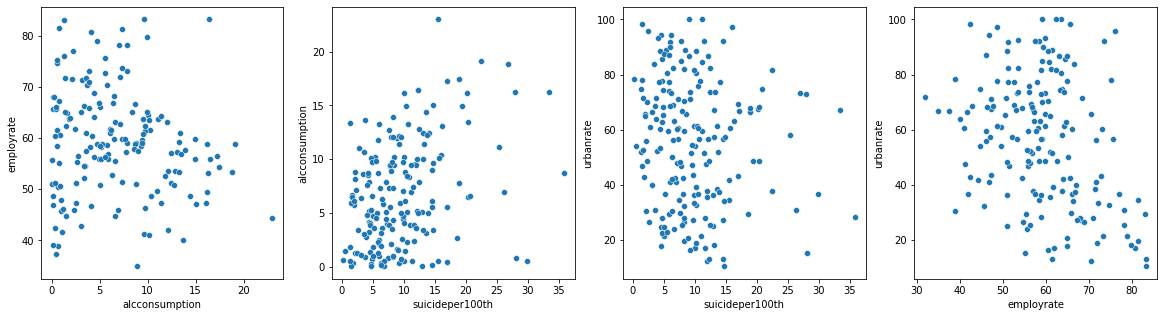

In [59]:
fig, ax = plt.subplots(1,4, figsize = (20,5))
sns.scatterplot(x="alcconsumption", y = "employrate", data = train_df, ax = ax[0])
sns.scatterplot(x="suicideper100th", y="alcconsumption", data = train_df, ax= ax[1])
sns.scatterplot(x="suicideper100th", y="urbanrate", data = train_df, ax = ax[2])
sns.scatterplot(x="employrate", y="urbanrate", data = train_df, ax = ax[3])


These plots are the ones which were highly correlated, that we figured out in correlation matrix. It does somtime confuse me with positive and negative values, but both the cases are correlated if the value is positive or the value is negative, both the values shows correlation, postive value shows positive correlation and negative value shows negative correlation.

# Analysis wrt Countries

In [100]:
def write_percentage(train_df, ax):
    for patches in ax.patches:
        height = patches.get_height()
        width = patches.get_width()
        x_loc = patches.get_x()
        values = height
        ax.text(x = x_loc + width/2, y=height, s = '{:1.1f}'.format(values), fontsize = 12 )

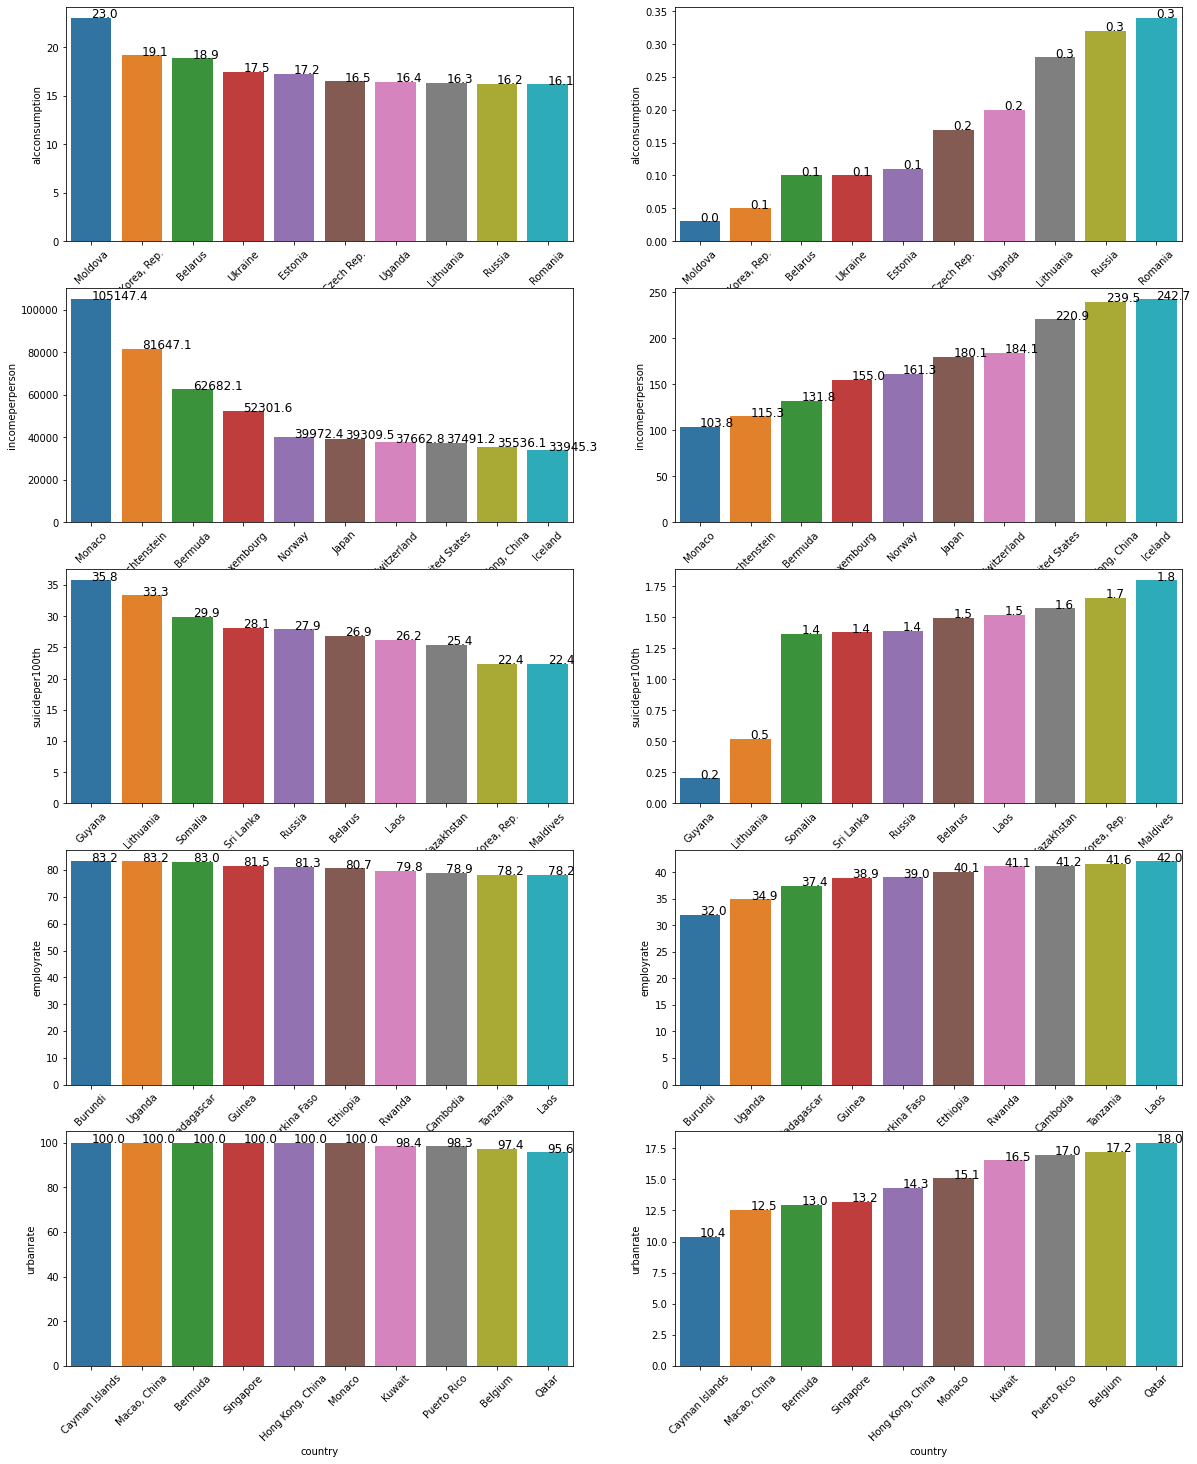

In [139]:
fig, ax = plt.subplots(5, 2, figsize = (20,25))
for idx, cols in enumerate(train_df.columns.to_list()[1:]):
        get_max_10_coutries = train_df.sort_values(by=cols, ascending=False)[["country", cols]][0:10]
        sns.barplot(x= "country", y = cols, data = get_max_10_coutries, ax = ax[idx][0] )
        ax[idx][0].set_xticklabels(ax[idx][0].get_xticklabels(), rotation = 45)
        write_percentage(employmentrate, ax[idx][0])
        get_min_10_countries = train_df.sort_values(by=cols, ascending=True)[["country", cols]][0:10]
        sns.barplot(x= "country", y = cols, data = get_min_10_countries, ax = ax[idx][1])
        ax[idx][1].set_xticklabels(ax[idx][0].get_xticklabels(), rotation = 45)
        write_percentage(employmentrate, ax[idx][1])

We could see from her the top 10 countries and the bottom 10 coutries with respect to their alcconsumption, incomeperperson, suicideper100th, mplotrate and urbanrate respectively.

**Hope this notebook helps you! **


**Have a nice day! **

## 